In [15]:
# Imports
from nb_utils import check_data_integrity_ling_spam, load_features_ling_spam, load_labels_ling_spam, evaluate_model, print_confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

from scipy.sparse import csr_matrix

# Data preprocessing: I couldn't access the deemed processed data in the provided
# links, so I downloaded the ling spam dataset on Kaggle (2893 messages). I then
# performed manual data preprocessing through the use of process_ling_spam.py and
# train_test_split_ling_spam.py in the CWD. There are 960 processed data points in
# processed_messages.csv. train_test_split_ling_spam.py outputed 8 files:

# /data/ling_spam/
# train-features.csv, train-labels.csv   : 768 data points
# test-features.csv, test-labels.csv     : 192 data points
# *-50.csv                               :  50 data points
# *-100.csv                              : 100 data points
# *-400.csv                              : 400 data points

# All processed datasets are relatively balanced
# The length of the corpus might not be exactly 2500 words

# Check data integrity (uncomment if needed)

file_pairs = [
    ('data/ling_spam/train-features.csv', 'data/ling_spam/train-labels.csv'),
    ('data/ling_spam/test-features.csv', 'data/ling_spam/test-labels.csv'),
    ('data/ling_spam/train-features-50.csv', 'data/ling_spam/train-labels-50.csv'),
    ('data/ling_spam/train-features-100.csv', 'data/ling_spam/train-labels-100.csv'),
    ('data/ling_spam/train-features-400.csv', 'data/ling_spam/train-labels-400.csv')
]

# Run integrity checks for each file pair

for features_file, labels_file in file_pairs:
    check_data_integrity_ling_spam(features_file, labels_file)

# Load test data
X_test = load_features_ling_spam('data/ling_spam/test-features.csv')
y_test = load_labels_ling_spam('data/ling_spam/test-labels.csv')
print("Testing data succesfully loaded")

1. Number of unique emails in features: 768
2. Number of labels: 768
   Match: Numbers are equal.
3. Balance of dataset:
   Non-spam (0): 394
   Spam (1): 374
4. Balance ratio: 0.95
5. Total missing values: 0
6. Word index range: 0 to 23857
7. Email indices: Continuous and start from 0

Overall: Data integrity check passed.

1. Number of unique emails in features: 192
2. Number of labels: 192
   Match: Numbers are equal.
3. Balance of dataset:
   Non-spam (0): 86
   Spam (1): 106
4. Balance ratio: 0.81
5. Total missing values: 0
6. Word index range: 0 to 23858
7. Email indices: Continuous and start from 0

Overall: Data integrity check passed.

1. Number of unique emails in features: 50
2. Number of labels: 50
   Match: Numbers are equal.
3. Balance of dataset:
   Non-spam (0): 19
   Spam (1): 31
4. Balance ratio: 0.61
5. Total missing values: 0
6. Word index range: 48 to 23845
7. Email indices: Continuous and start from 0

Overall: Data integrity check passed.

1. Number of unique ema

In [16]:
print("Training with 50 samples:")
X_train_50 = load_features_ling_spam('data/ling_spam/train-features-50.csv')
y_train_50 = load_labels_ling_spam('data/ling_spam/train-labels-50.csv')

model_50 = MultinomialNB()
model_50.fit(X_train_50, y_train_50)

y_pred_50 = model_50.predict(X_test)
evaluate_model(y_test, y_pred_50)

print_confusion_matrix(y_test, y_pred_50)

Training with 50 samples:
Accuracy: 0.9219
Precision: 0.8824
Recall: 0.9906
F1-score: 0.9333
Confusion Matrix:
[[ 72  14]
 [  1 105]]
True Negatives: 72
False Positives: 14
False Negatives: 1
True Positives: 105



In [17]:
print("\nTraining with 100 samples:")
X_train_100 = load_features_ling_spam('data/ling_spam/train-features-100.csv')
y_train_100 = load_labels_ling_spam('data/ling_spam/train-labels-100.csv')

model_100 = MultinomialNB()
model_100.fit(X_train_100, y_train_100)

y_pred_100 = model_100.predict(X_test)
evaluate_model(y_test, y_pred_100)

print_confusion_matrix(y_test, y_pred_100)


Training with 100 samples:
Accuracy: 0.9688
Precision: 0.9545
Recall: 0.9906
F1-score: 0.9722
Confusion Matrix:
[[ 81   5]
 [  1 105]]
True Negatives: 81
False Positives: 5
False Negatives: 1
True Positives: 105



In [18]:
print("\nTraining with 400 samples:")
X_train_400 = load_features_ling_spam('data/ling_spam/train-features-400.csv')
y_train_400 = load_labels_ling_spam('data/ling_spam/train-labels-400.csv')

model_400 = MultinomialNB()
model_400.fit(X_train_400, y_train_400)

y_pred_400 = model_400.predict(X_test)
evaluate_model(y_test, y_pred_400)

print_confusion_matrix(y_test, y_pred_400)


Training with 400 samples:
Accuracy: 0.9948
Precision: 1.0000
Recall: 0.9906
F1-score: 0.9953
Confusion Matrix:
[[ 86   0]
 [  1 105]]
True Negatives: 86
False Positives: 0
False Negatives: 1
True Positives: 105



In [19]:
print("\nTraining with full dataset (768 samples):")
X_train_full = load_features_ling_spam('data/ling_spam/train-features.csv')
y_train_full = load_labels_ling_spam('data/ling_spam/train-labels.csv')

model_full = MultinomialNB()
model_full.fit(X_train_full, y_train_full)

y_pred_full = model_full.predict(X_test)
evaluate_model(y_test, y_pred_full)

print_confusion_matrix(y_test, y_pred_full)


Training with full dataset (768 samples):
Accuracy: 0.9948
Precision: 1.0000
Recall: 0.9906
F1-score: 0.9953
Confusion Matrix:
[[ 86   0]
 [  1 105]]
True Negatives: 86
False Positives: 0
False Negatives: 1
True Positives: 105



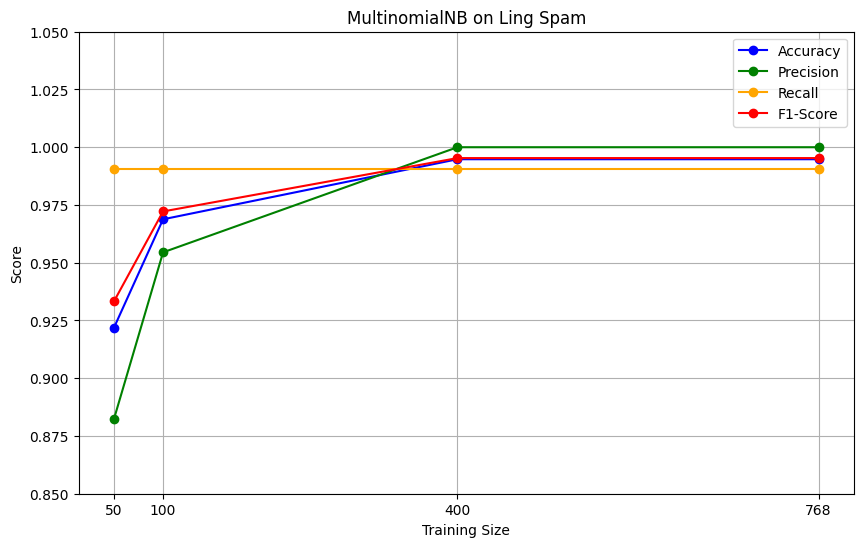

In [20]:
# Visualizing the results
training_sizes = [50, 100, 400, 768]
accuracies = [0.9219, 0.9688, 0.9948, 0.9948]
precisions = [0.8824, 0.9545, 1.0000, 1.0000]
recalls = [0.9906, 0.9906, 0.9906, 0.9906]
f1_scores = [0.9333, 0.9722, 0.9953, 0.9953]

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracies, marker='o', label='Accuracy', color='blue')
plt.plot(training_sizes, precisions, marker='o', label='Precision', color='green')
plt.plot(training_sizes, recalls, marker='o', label='Recall', color='orange')
plt.plot(training_sizes, f1_scores, marker='o', label='F1-Score', color='red')

plt.ylim(0.85, 1.05)
plt.xticks(training_sizes)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('MultinomialNB on Ling Spam')
plt.axhline(0.8, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid()

plt.show()